Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [12]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

In this assignment, I used fill with average, since this approach can fill all the missing values.

In [4]:
# fillna with average
df.info()
df.head()

df_fill = df.copy()
for col in df_fill.columns.unique():
        if col not in ['PRIMARY_KEY', 'STATE', 'YEAR']:
#             print(state, col, df_2[df_2.STATE == state][col].mean())
            df_fill[col].fillna(df_fill[col].mean(), inplace=True)
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
ANS:using visulization method--boxplot, which is also the visual application of Turkey's method
    yes, both of them have outliers, the whis is by default = 1.5

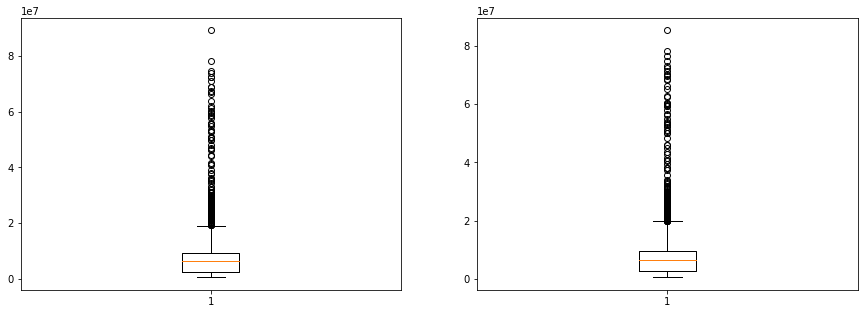

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(df_fill.TOTAL_REVENUE)
plt.subplot(1,2,2)
plt.boxplot(df_fill.TOTAL_EXPENDITURE)
plt.show()

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
ANS: use winsorization to drop outliers, set threshold to 90% percentile
note that, totla-revenue has one outlier when threshold set to 90%, then set to 89%, and all the outliers are gone.


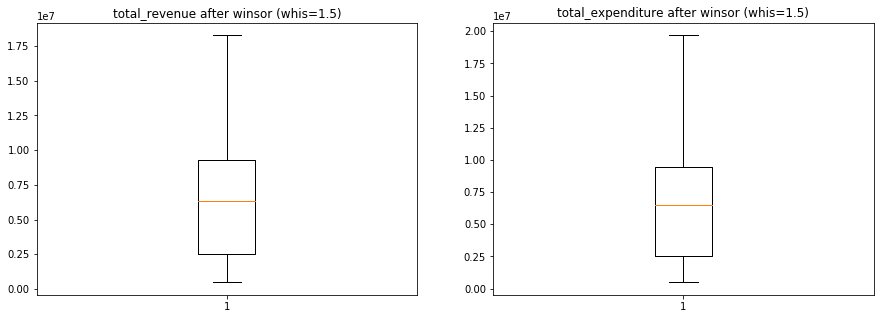

In [29]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
df_winsor_total_revenue = winsorize(df_fill.TOTAL_REVENUE, (0, 0.11))
df_winsor_total_expenditure = winsorize(df_fill.TOTAL_EXPENDITURE, (0, 0.10))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(df_winsor_total_revenue)
plt.title("total_revenue after winsor (whis=1.5)")
plt.subplot(1,2,2)
plt.boxplot(df_winsor_total_expenditure)
plt.title("total_expenditure after winsor (whis=1.5)")
plt.show()



3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
ANS: again, use winsorization to drop outliers. 
note that, the threshold for winsorization was set manually after eyeball it. This process can be automatically performed.

Text(0.5, 1.0, 'budget_deficit after winsor (whis=1.5)')

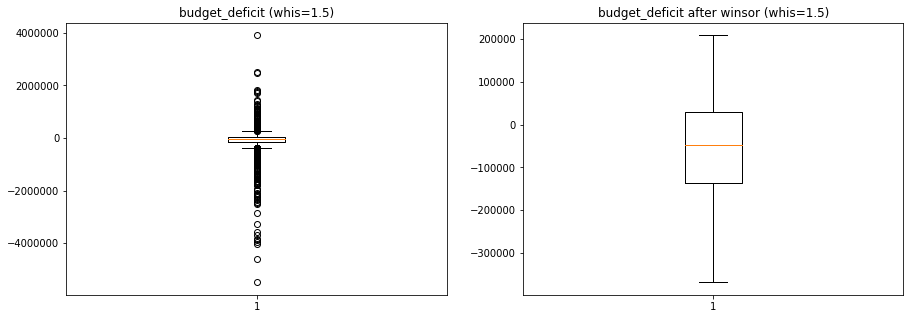

In [36]:
plt.figure(figsize = (15,5))

df_budget_deficit = df_fill.TOTAL_REVENUE - df_fill.TOTAL_EXPENDITURE
plt.subplot(1,2,1)
plt.boxplot(df_budget_deficit)
plt.title("budget_deficit (whis=1.5)")

df_budget_deficit_winsor = winsorize(df_budget_deficit, (0.11, 0.10))
plt.subplot(1,2,2)
plt.boxplot(df_budget_deficit_winsor)
plt.title("budget_deficit after winsor (whis=1.5)")

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
ANS: outliers still exist when using outlier-eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE.
note that, when performing winsorization to drop outliers, the lower bound threshold increased in order to get rid of all outliers under 1.5-whis setting.

Text(0.5, 1.0, 'budget_deficit after winsor (whis=1.5)')

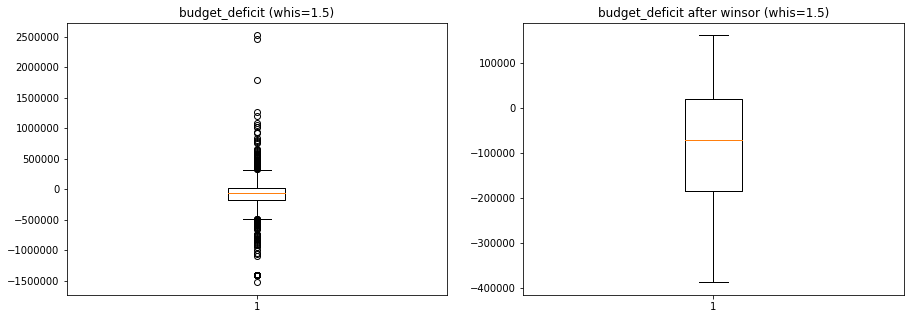

In [38]:
plt.figure(figsize = (15,5))

df_budget_deficit_trim = df_winsor_total_revenue - df_winsor_total_expenditure
plt.subplot(1,2,1)
plt.boxplot(df_budget_deficit_trim)
plt.title("budget_deficit (whis=1.5)")

df_budget_deficit_trim_winsor = winsorize(df_budget_deficit_trim, (0.15, 0.10))
plt.subplot(1,2,2)
plt.boxplot(df_budget_deficit_trim_winsor)
plt.title("budget_deficit after winsor (whis=1.5)")

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
ANS: yes.
the max, min, mean, median,  quartile are not the same.

qusestion3:  DescribeResult(nobs=1492, minmax=(-368853.0, 208528.0), mean=-63528.097287617245, variance=27913074893.142113, skewness=-0.2575807196103463, kurtosis=-0.5514664615037788)
qusestion4:  DescribeResult(nobs=1492, minmax=(-387787.0, 161455.0), mean=-90181.81779700062, variance=28929979701.508846, skewness=-0.4534655808149957, kurtosis=-0.7268609782759787)


(-400000, 300000)

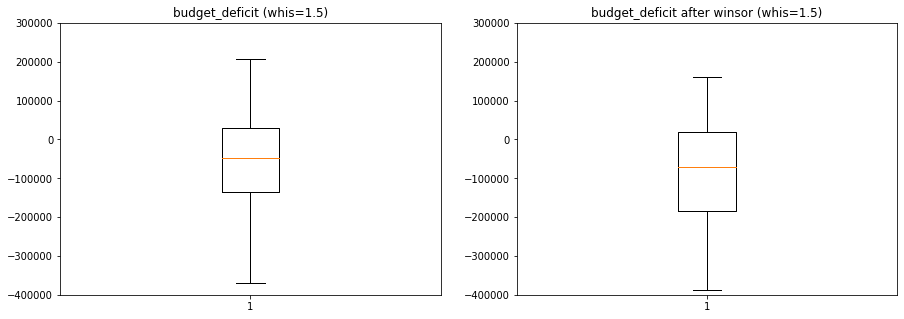

In [48]:
import scipy.stats as stats
print("qusestion3: ", stats.describe(df_budget_deficit_winsor))
print("qusestion4: ", stats.describe(df_budget_deficit_trim_winsor))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(df_budget_deficit_winsor)
plt.title("budget_deficit (whis=1.5)")
plt.ylim(-400000, 300000)

plt.subplot(1,2,2)
plt.boxplot(df_budget_deficit_trim_winsor)
plt.title("budget_deficit after winsor (whis=1.5)")
plt.ylim(-400000, 300000)

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?
ANS: maybe from question 3, since everytime we perform outlier reduction, we lose part of the information. For methods in question3, we drop outliers once (for budget deficit variable); while for methods in question4, we drop outliers three times (for budget revenue, budget expenditure, and finally for budet deficit), which means we have lost more information at each time.

# takeaways
- I chose different method to fill null from the example solution. My priority for this checkpoint is to practice outiers handeling, so I didn't want to drop too many null records, thus I chose fill with average instead of interpolation method. Note that even for interpolation method, some part doesn't make sense, because it filled null regardless of the difference between states. But I think the principle is, we should not fill null carelessly; and it is better to analyze each variable and use different strategies. But another problem arised, what if variables have different null values number if we treat them differently? Would that affect our analysis. Maybe that's why the example solution dropnull at the end, which made the spreadsheet clean.

- another takeaway is I got it right for question 6. We should avoid dropping data and cause loss of information at each step, instead, we should try to drop outliers at the end.